# Implementing and Testing Line Search Conditions in Gradient Descent

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

In this assignment, you will modify an existing Python code for gradient descent to include various line search conditions. You will test these modifications on two functions: a quadratic function and the Rosenbrock function. The main objectives are to understand how different line search strategies influence the convergence of the gradient descent algorithm and to compare their efficiencies based on the number of function evaluations.

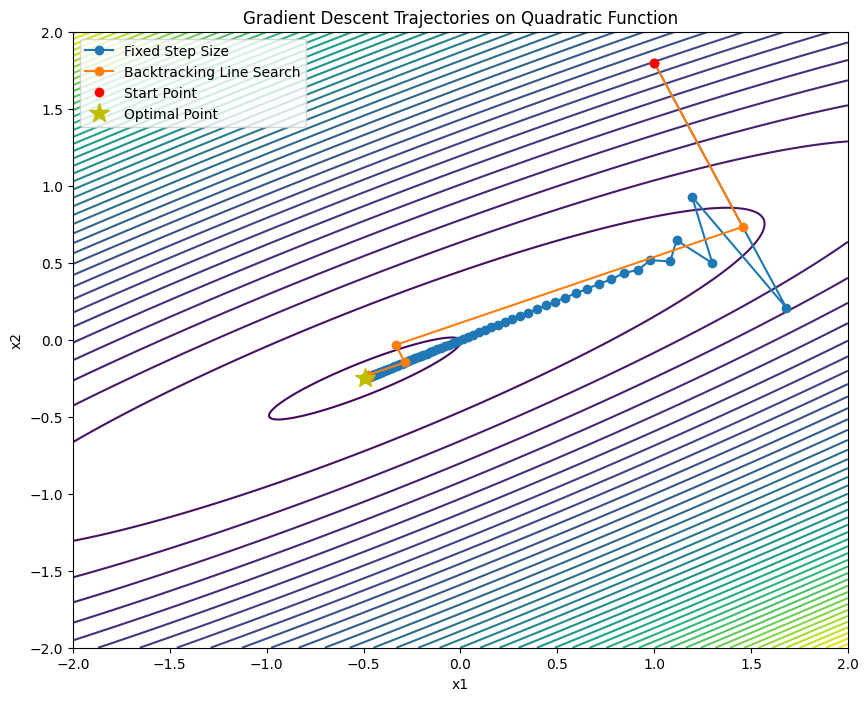

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
np.random.seed(214)

# Define the quadratic function and its gradient
def quadratic_function(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def grad_quadratic(x, A, b):
    return np.dot(A, x) - b

# Generate a 2D quadratic problem with a specified condition number
def generate_quadratic_problem(cond_number):
    # Random symmetric matrix
    M = np.random.randn(2, 2)
    M = np.dot(M, M.T)

    # Ensure the matrix has the desired condition number
    U, s, V = np.linalg.svd(M)
    s = np.linspace(cond_number, 1, len(s))  # Spread the singular values
    A = np.dot(U, np.dot(np.diag(s), V))

    # Random b
    b = np.random.randn(2)

    return A, b

# Gradient descent function
def gradient_descent(start_point, A, b, stepsize_func, max_iter=100):
    x = start_point.copy()
    trajectory = [x.copy()]

    for i in range(max_iter):
        grad = grad_quadratic(x, A, b)
        step_size = stepsize_func(x, grad)
        x -= step_size * grad
        trajectory.append(x.copy())

    return np.array(trajectory)

# Backtracking line search strategy using scipy
def backtracking_line_search(x, grad, A, b, alpha=0.3, beta=0.8):
    def objective(t):
        return quadratic_function(x - t * grad, A, b)
    res = minimize_scalar(objective, method='golden')
    return res.x

# Generate ill-posed problem
cond_number = 30
A, b = generate_quadratic_problem(cond_number)

# Starting point
start_point = np.array([1.0, 1.8])

# Perform gradient descent with both strategies
trajectory_fixed = gradient_descent(start_point, A, b, lambda x, g: 5e-2)
trajectory_backtracking = gradient_descent(start_point, A, b, lambda x, g: backtracking_line_search(x, g, A, b))

# Plot the trajectories on a contour plot
x1, x2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = np.array([quadratic_function(np.array([x, y]), A, b) for x, y in zip(x1.flatten(), x2.flatten())]).reshape(x1.shape)

plt.figure(figsize=(10, 8))
plt.contour(x1, x2, Z, levels=50, cmap='viridis')
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], 'o-', label='Fixed Step Size')
plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], 'o-', label='Backtracking Line Search')

# Add markers for start and optimal points
plt.plot(start_point[0], start_point[1], 'ro', label='Start Point')
optimal_point = np.linalg.solve(A, b)
plt.plot(optimal_point[0], optimal_point[1], 'y*', markersize=15, label='Optimal Point')

plt.legend()
plt.title('Gradient Descent Trajectories on Quadratic Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig("linesearch.svg")
plt.show()

Start by reviewing the provided Python code. This code implements gradient descent with a fixed step size and a backtracking line search on a quadratic function. Familiarize yourself with how the gradient descent function and the step size strategies are implemented.

1. Modify the gradient descent function to include the following line search conditions:
    
    a. Sufficient Decrease Condition

    b. Curvature Condition

    c. Goldstein Condition

    d. Wolfe Condition
    
    e. Dichotomy

    Test your modified gradient descent algorithm with the implemented line search conditions on the provided quadratic function. Plot the trajectories over iterations for each condition. Choose and specify hyperparameters for inexact line search condition. Choose and specify the termination criterion. Start from the point $x_0 = (-1, 2)^T$.

1. Compare these 7 methods from the budget perspective. Plot the graph of function value from the number of function evaluations for each method on the same graph.

1. Plot trajectory for another function with the same set of methods

    $$
    f(x_1, x_2) =  10(x_2 − x_1^2)^2 + (x_1 − 1)^2
    $$

    with $x_0 = (-1, 2)^T$. You might need to adjust hyperparameters.

1. Plot the same function value from the number of function calls for this experiment.